In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import pickle
import time
import os
import seaborn as sns
from datetime import datetime

In [2]:
sns.set_style("whitegrid")

In [3]:
#### GILD and GSK
ticker1 = 'GILD'
ticker2= 'GSK'

# ticker1 = 'JPM'
# ticker2= 'MS'

log_dir = './logs/{}_{}_random_digital'.format(ticker1, ticker2)

In [4]:
with open('{}/{}_{}_ratios.pickle'.format(log_dir, ticker1, ticker2), 'rb') as fp:
    ratios = pickle.load(fp)

In [5]:
with open('{}/{}_{}_Mc_max.pickle'.format(log_dir, ticker1, ticker2), 'rb') as fp:
    Mc_max = pickle.load(fp)
with open('{}/{}_{}_Mc_min.pickle'.format(log_dir, ticker1, ticker2), 'rb') as fp:
    Mc_min = pickle.load(fp)
with open('{}/{}_{}_MOT_max.pickle'.format(log_dir, ticker1, ticker2), 'rb') as fp:
    MOT_max = pickle.load(fp)
with open('{}/{}_{}_MOT_min.pickle'.format(log_dir, ticker1, ticker2), 'rb') as fp:
    MOT_min = pickle.load(fp)

In [6]:
ratios.shape

(100, 50)

In [7]:
ratios = ratios.reshape(-1)

In [8]:
size = ratios.shape[0]

In [9]:
(ratios<1).sum()/size

0.5652

In [10]:
np.median(ratios)

0.9999999999999928

In [11]:
np.mean(ratios)

0.7982938916492595

In [12]:
ratios.min()

0.004545454545454547

In [13]:
min_idx = np.argmin(ratios)

In [14]:
MOT_max = MOT_max.reshape(-1)
MOT_min = MOT_min.reshape(-1)

In [15]:
MOT_max[min_idx], MOT_min[min_idx]

(10.005697413094524, 0.0)

In [16]:
Mc_max = Mc_max.reshape(-1)
Mc_min = Mc_min.reshape(-1)

In [17]:
Mc_max[min_idx], Mc_min[min_idx]

(0.0454804427867933, 0.0)

In [18]:
res = pd.DataFrame({'Ratios': ratios})

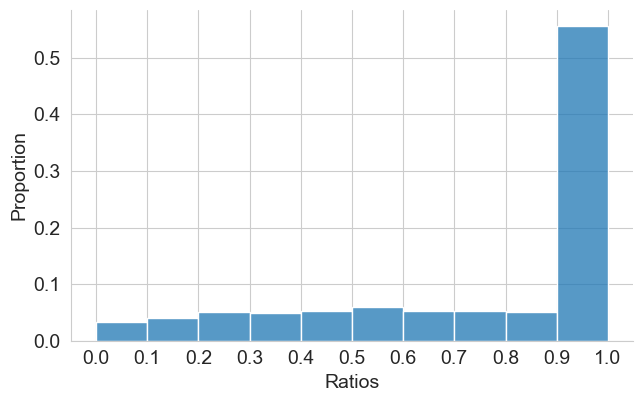

In [19]:
sns.displot(res['Ratios'], stat='probability', color='tab:blue', bins=np.linspace(0.0, 1.0, num=11),
            height=4, aspect=1.6) #bins=np.linspace(0.955, 1.0, num=10)
plt.xticks(np.linspace(0.0, 1.0, num=11), fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('Ratios', fontsize = 14)
plt.ylabel('Proportion', fontsize = 14)
plt.savefig('./{}_{}_random.pdf'.format(ticker1, ticker2), format='pdf',
            dpi=1000, bbox_inches='tight', pad_inches=0.1)
# plt.show()